In [1]:
import cv2
import numpy as np
from PIL import Image
from os.path import join

import src.tvData as tv
import src.constants as constants

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [2]:
folder = './data/gr_ringstrecke_s4/'
df = tv.get_df(constants.FILES_S4, folder)
arr, df = tv.to_img_arr(df)
bw = Image.fromarray(arr)

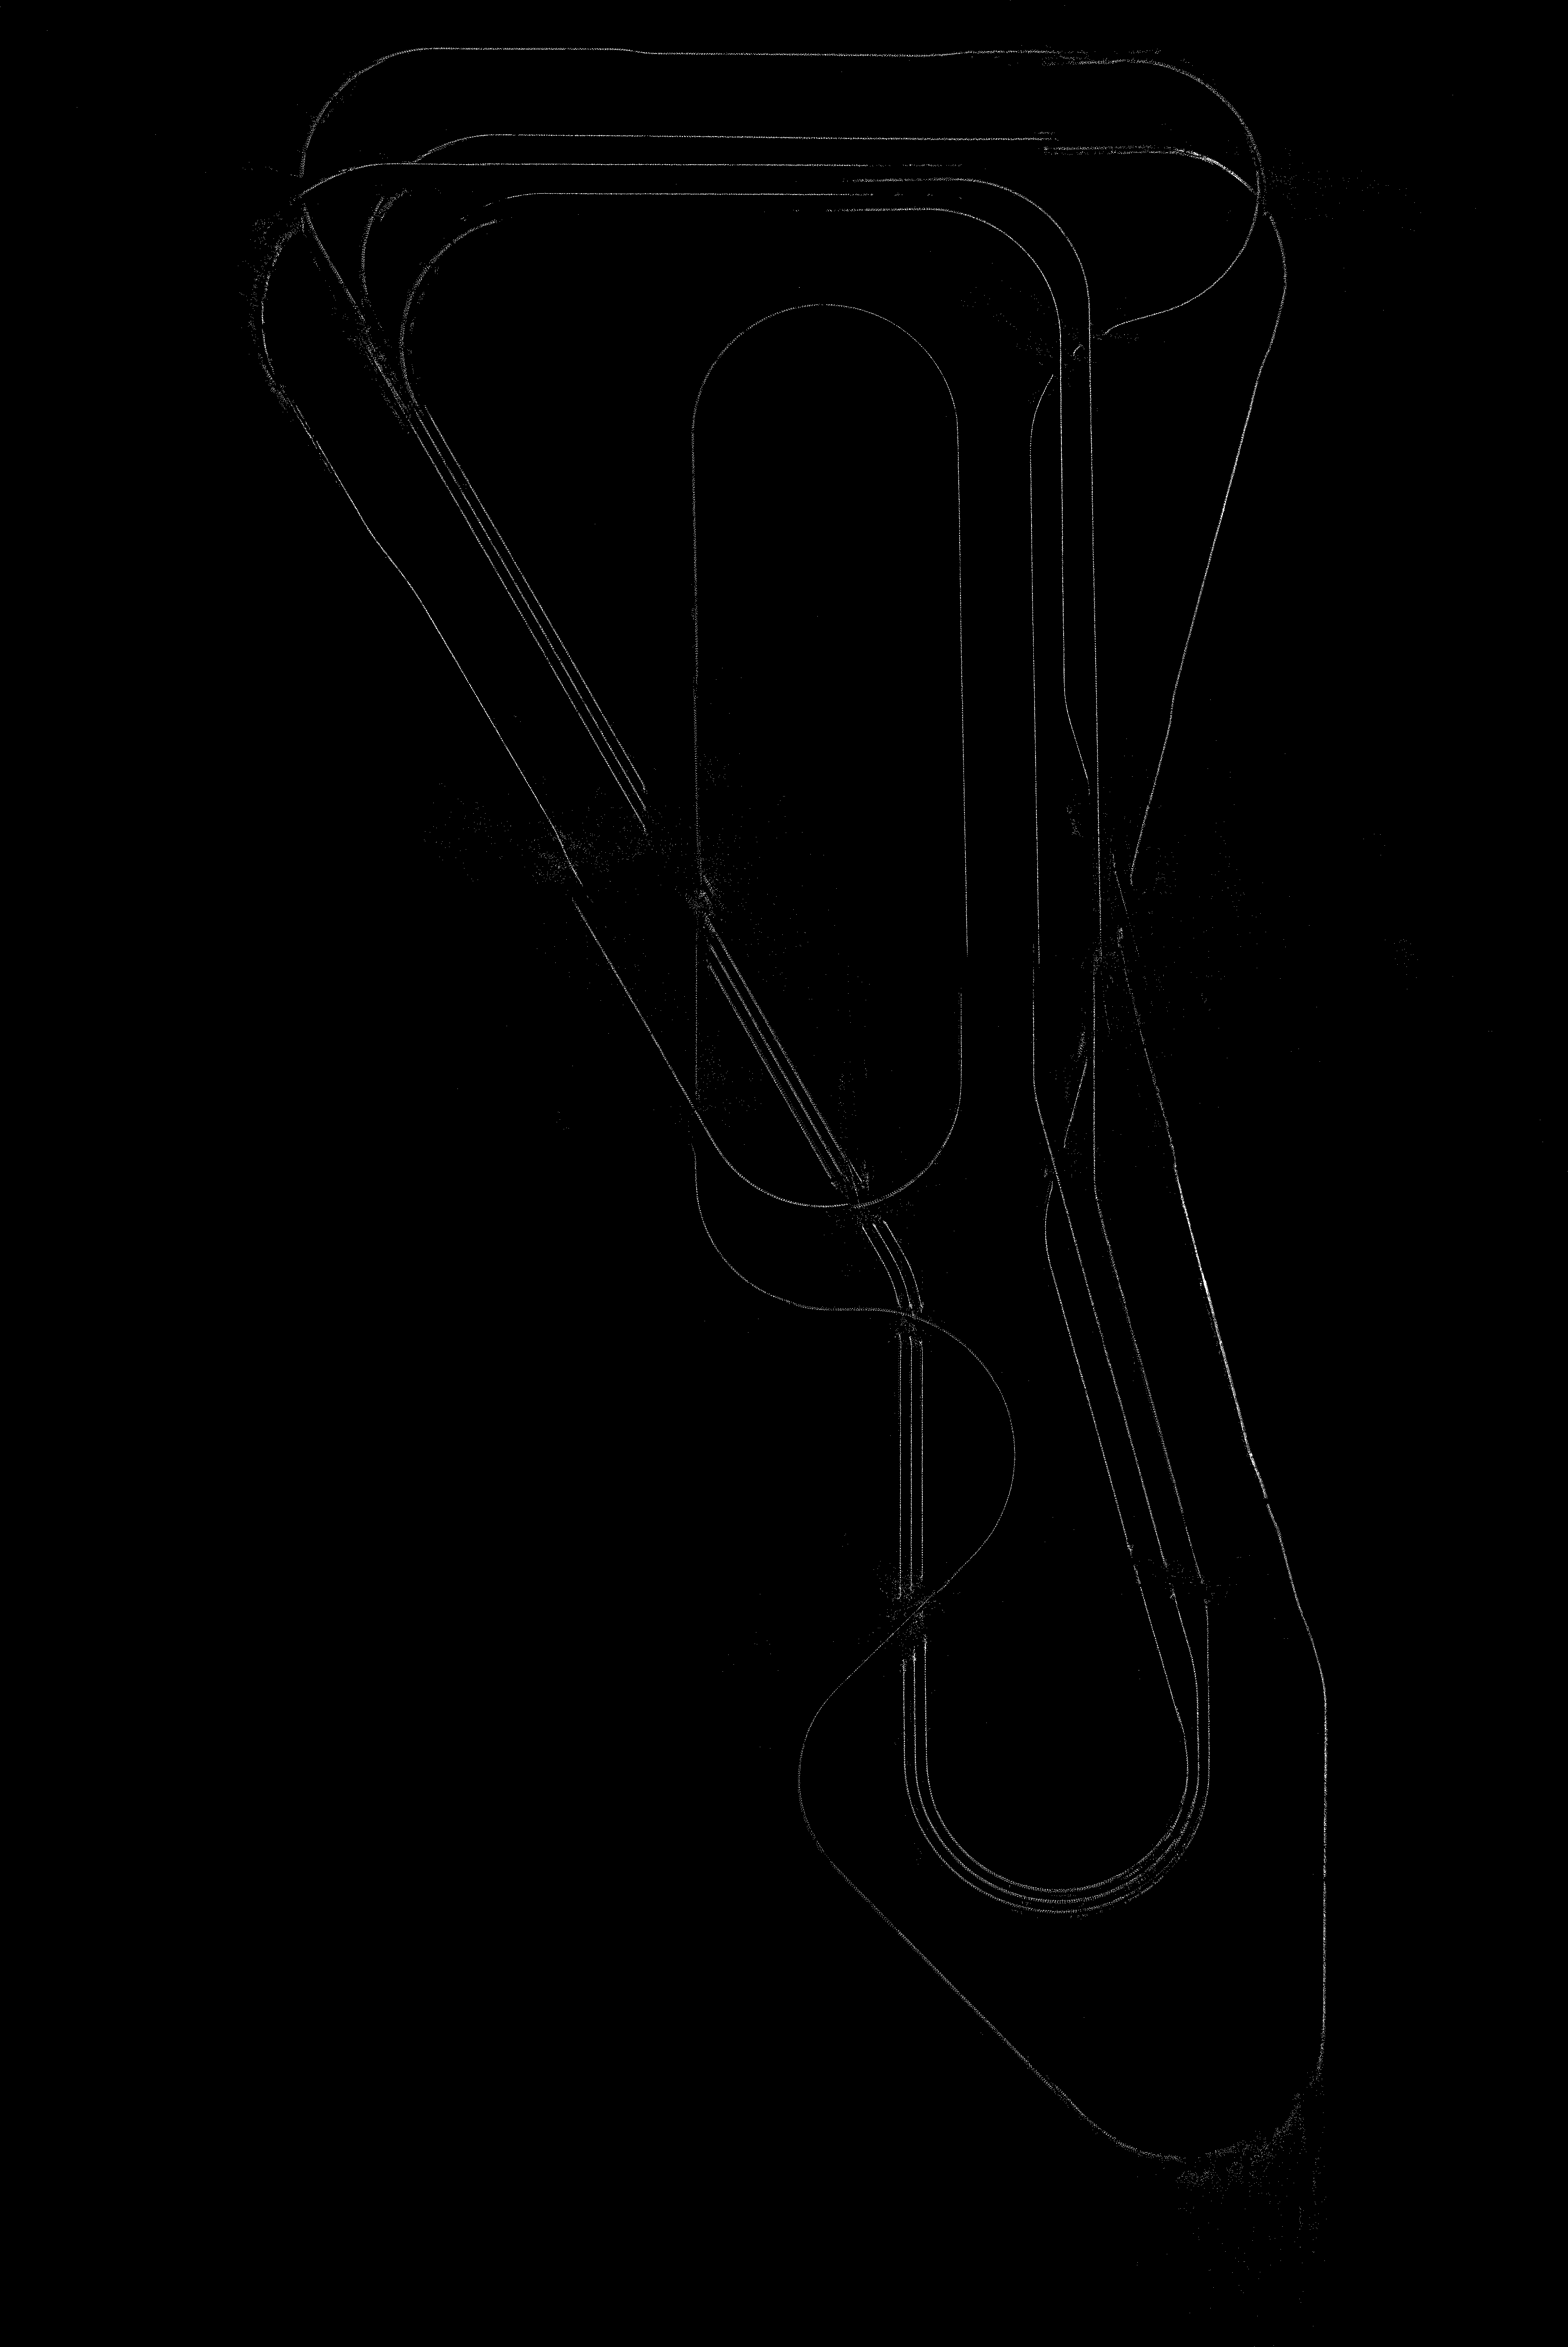

In [3]:
bw.save(join(constants.DUMP, 'pixels.png'))
display(bw)

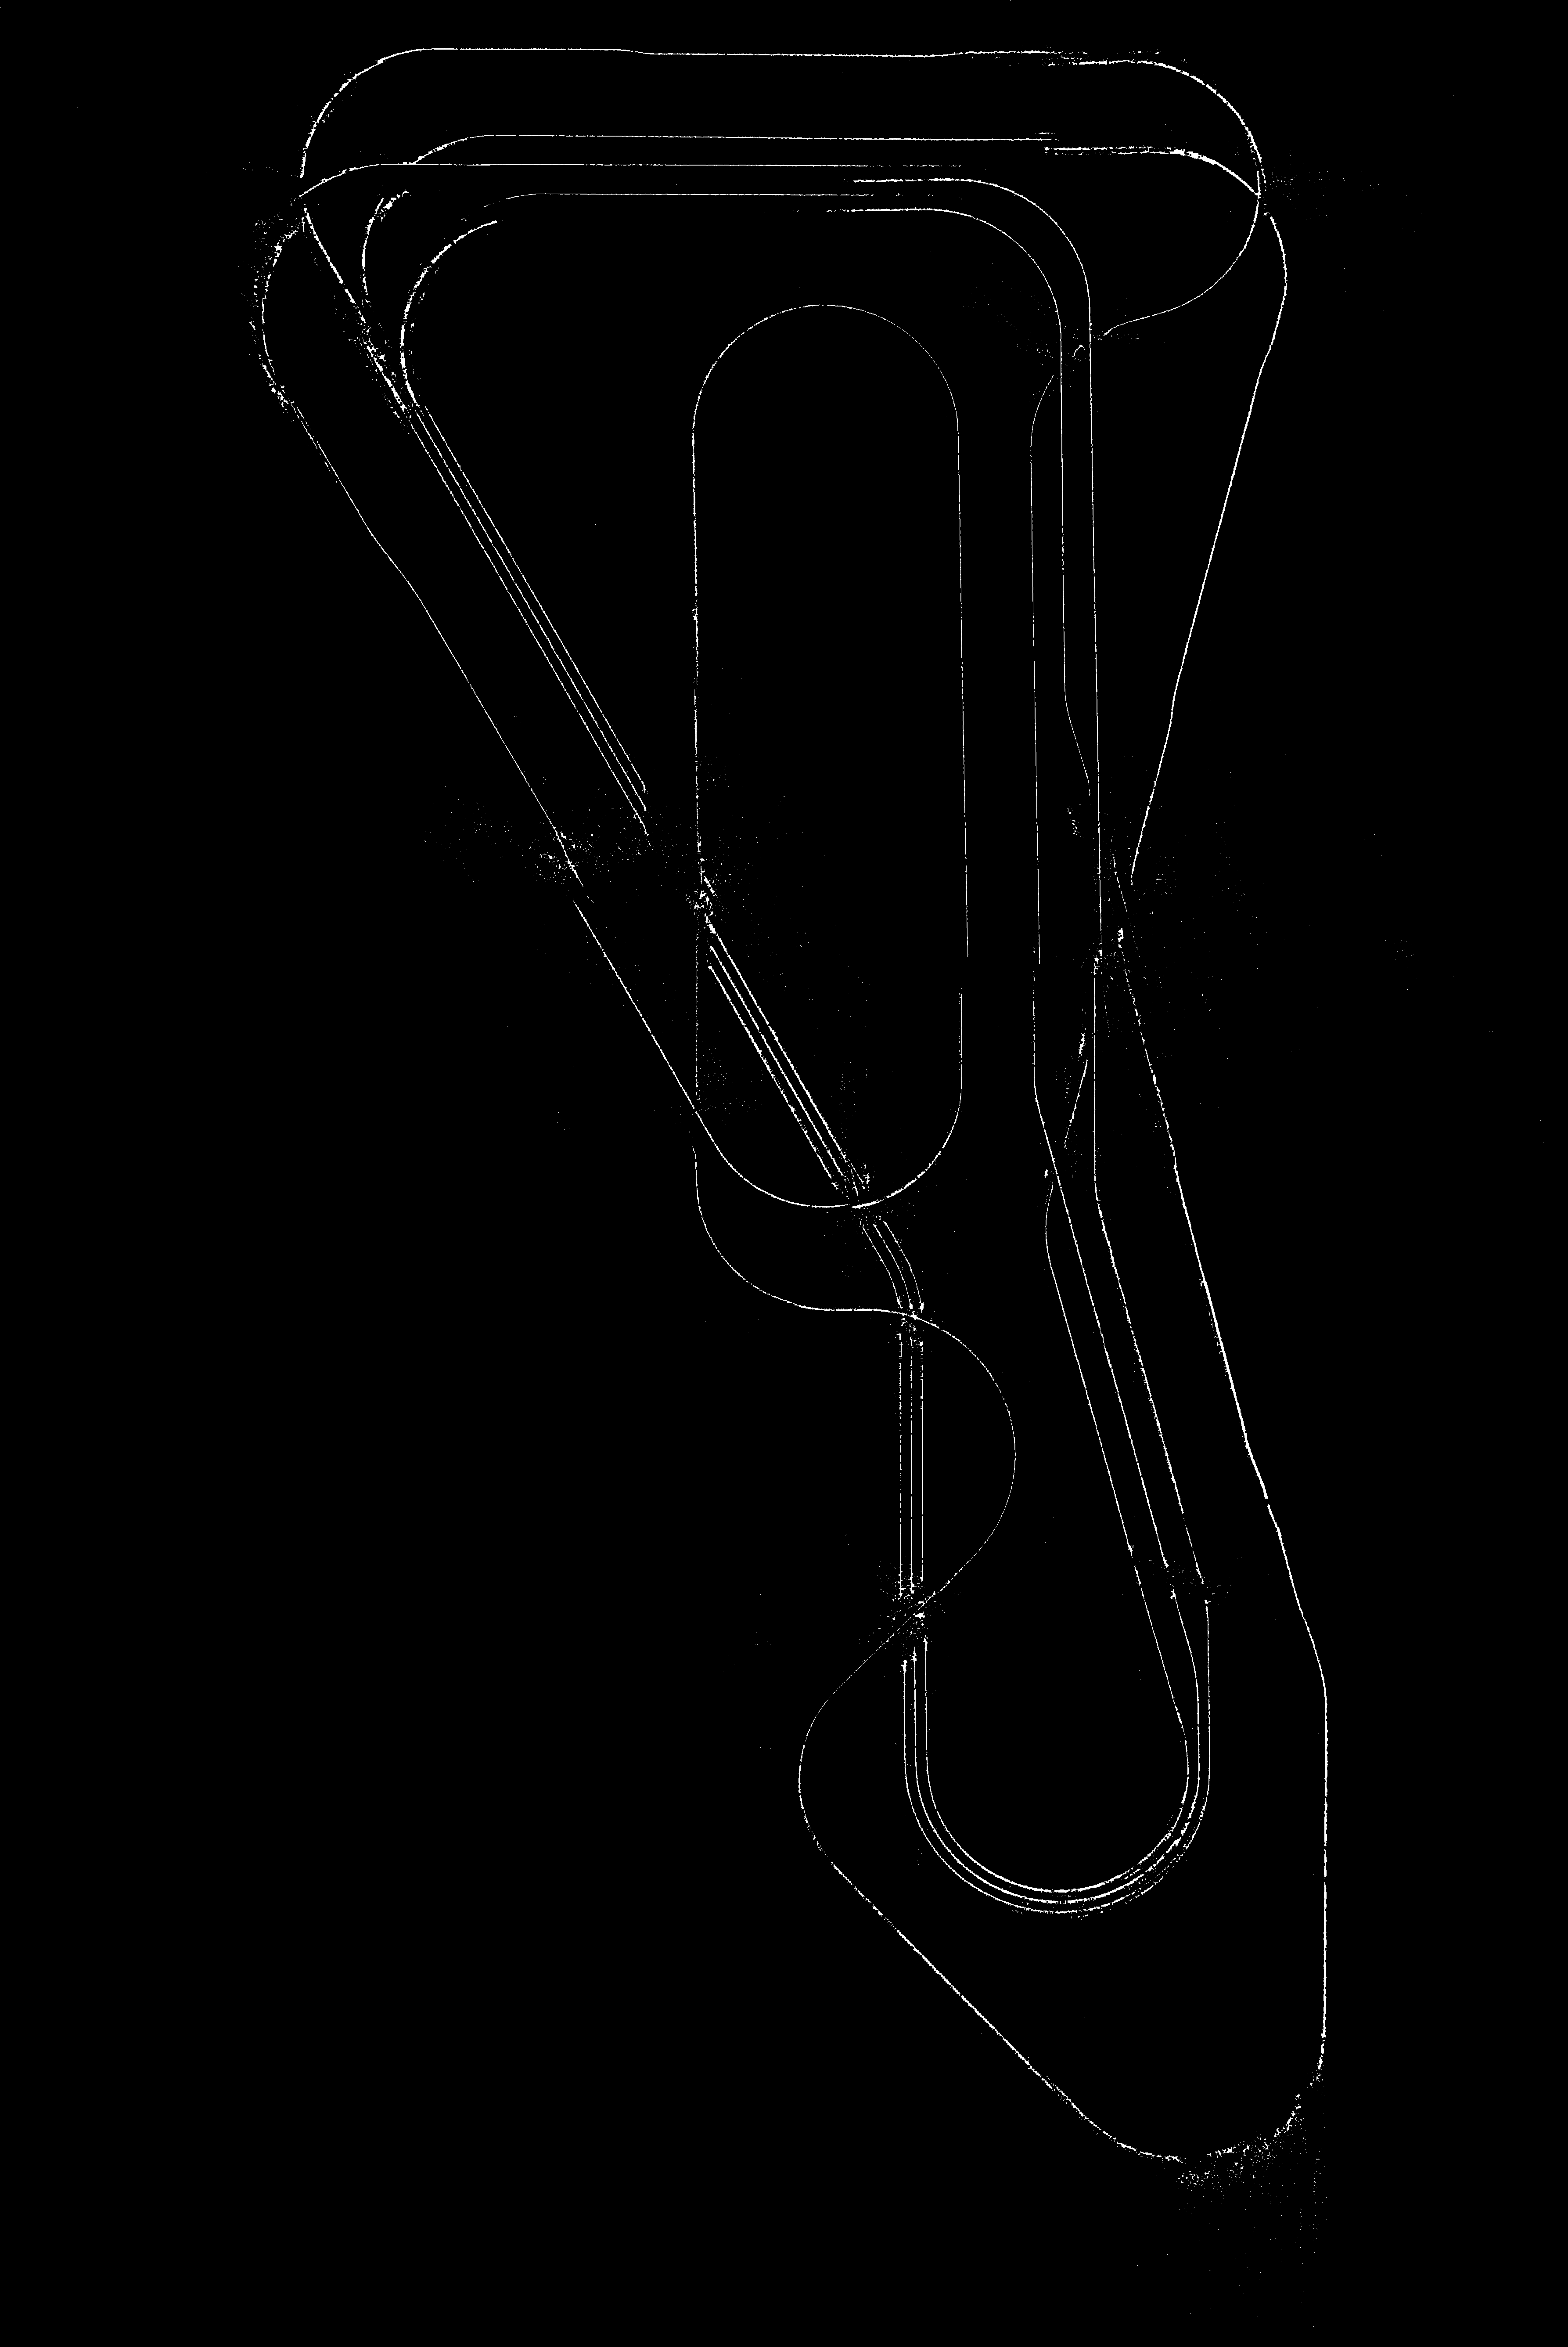

In [4]:
# closing: dilation followed by erosion -> remove pepper
kernel = np.ones((4, 4), np.uint8)
pepperfree = cv2.morphologyEx(arr, cv2.MORPH_CLOSE, kernel)
display(Image.fromarray(pepperfree))

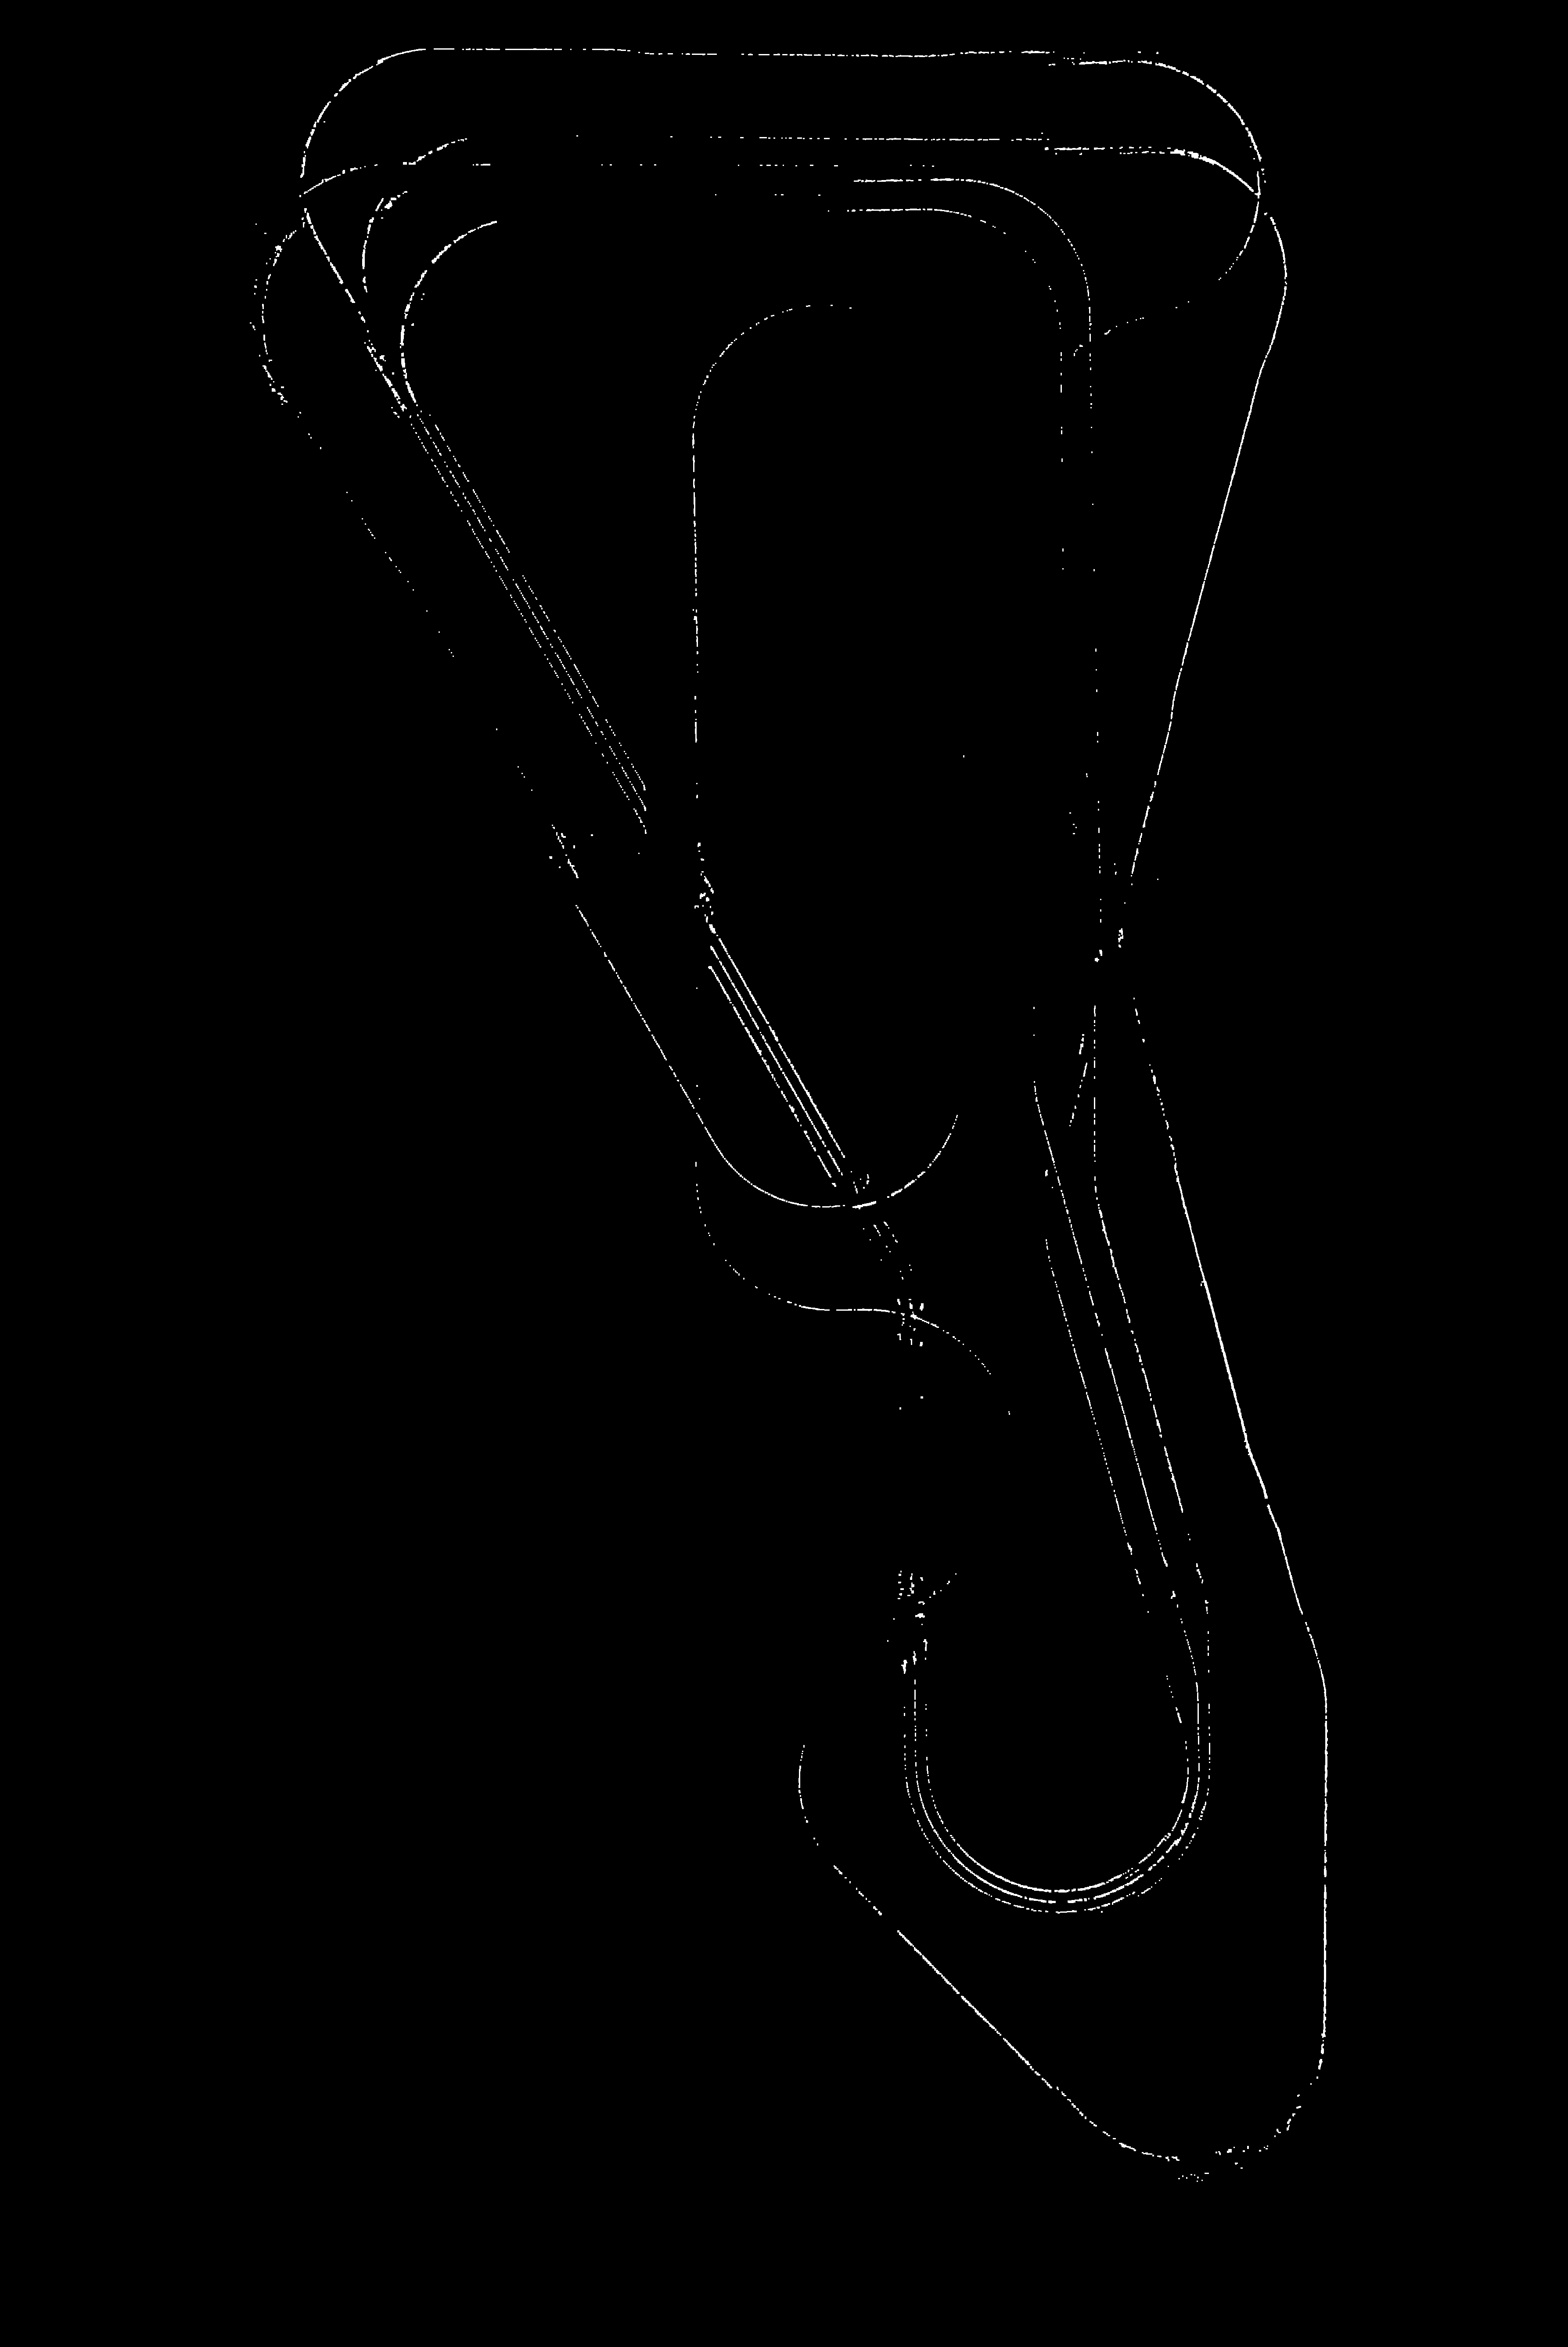

In [5]:
# opening: erosion followed by dilation -> remove salt
kernel = np.ones((3, 3), np.uint8)
saltfree = cv2.morphologyEx(pepperfree, cv2.MORPH_OPEN, kernel)
display(Image.fromarray(saltfree))

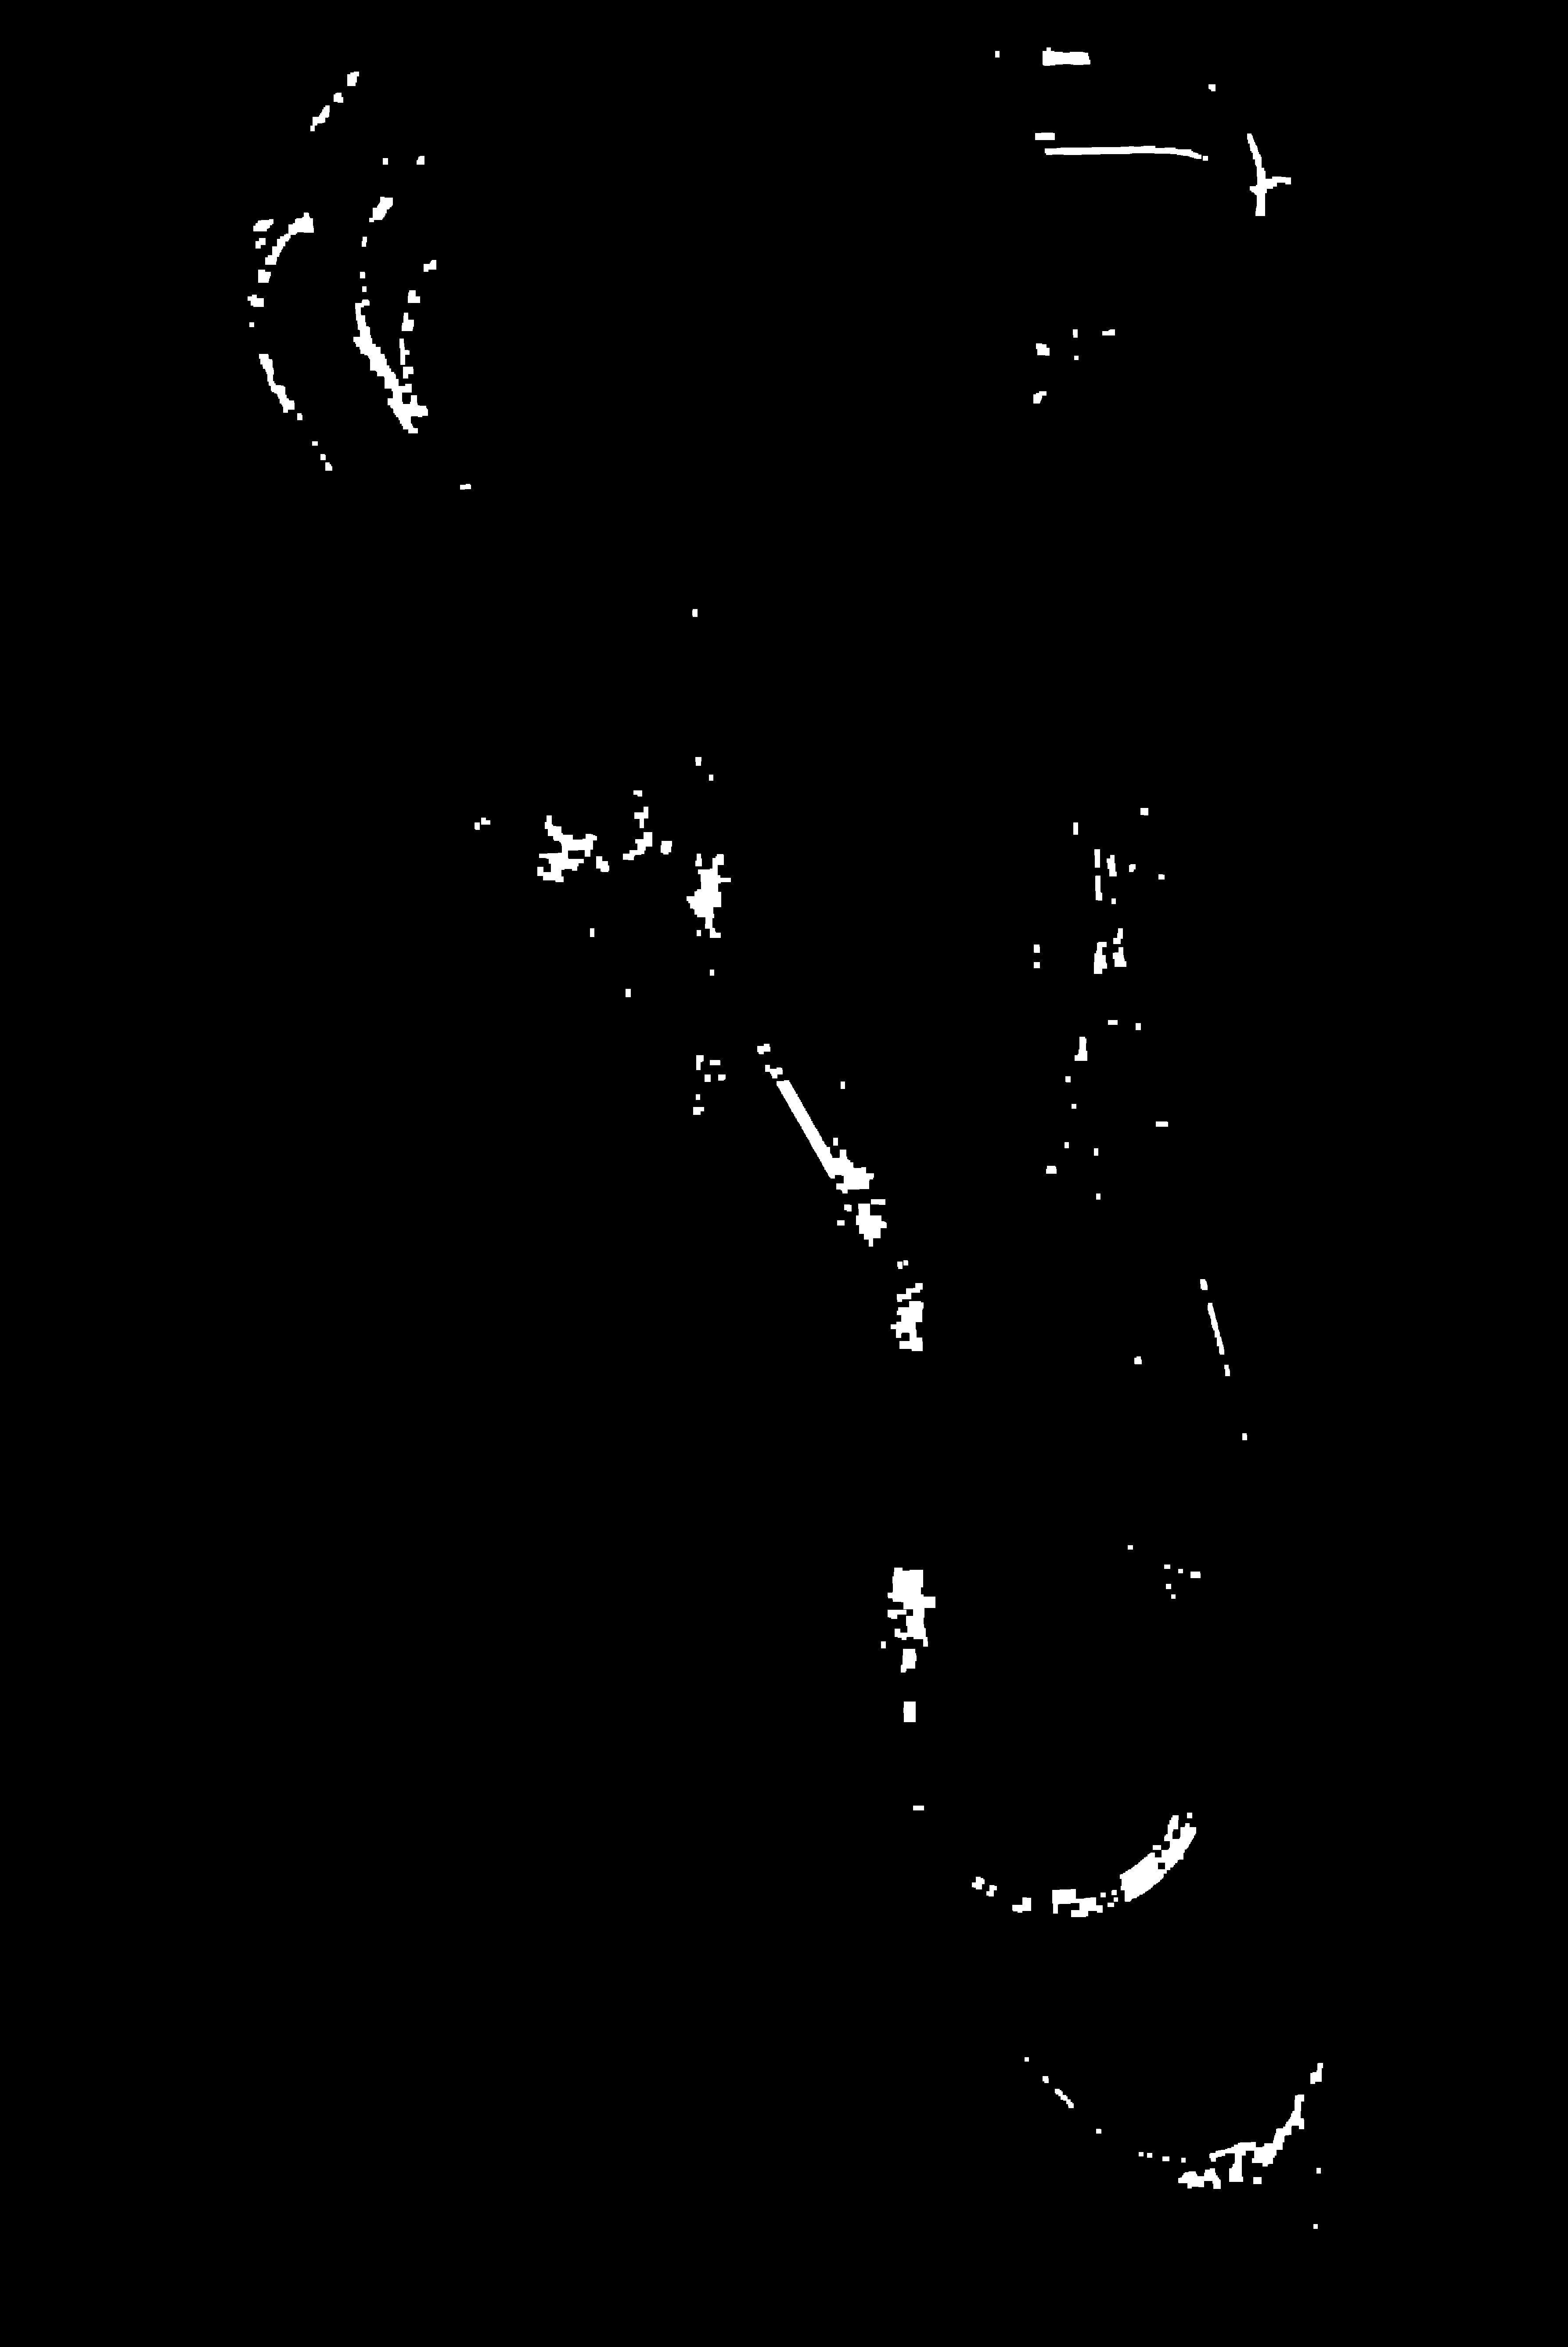

In [6]:
# find cluster, areas with a lot of noise
# noise to area then remove lines

kernel = np.ones((15, 15), np.uint8)
cluster = cv2.morphologyEx(arr, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((10, 10), np.uint8)
cluster = cv2.morphologyEx(cluster, cv2.MORPH_OPEN, kernel)

display(Image.fromarray(cluster))

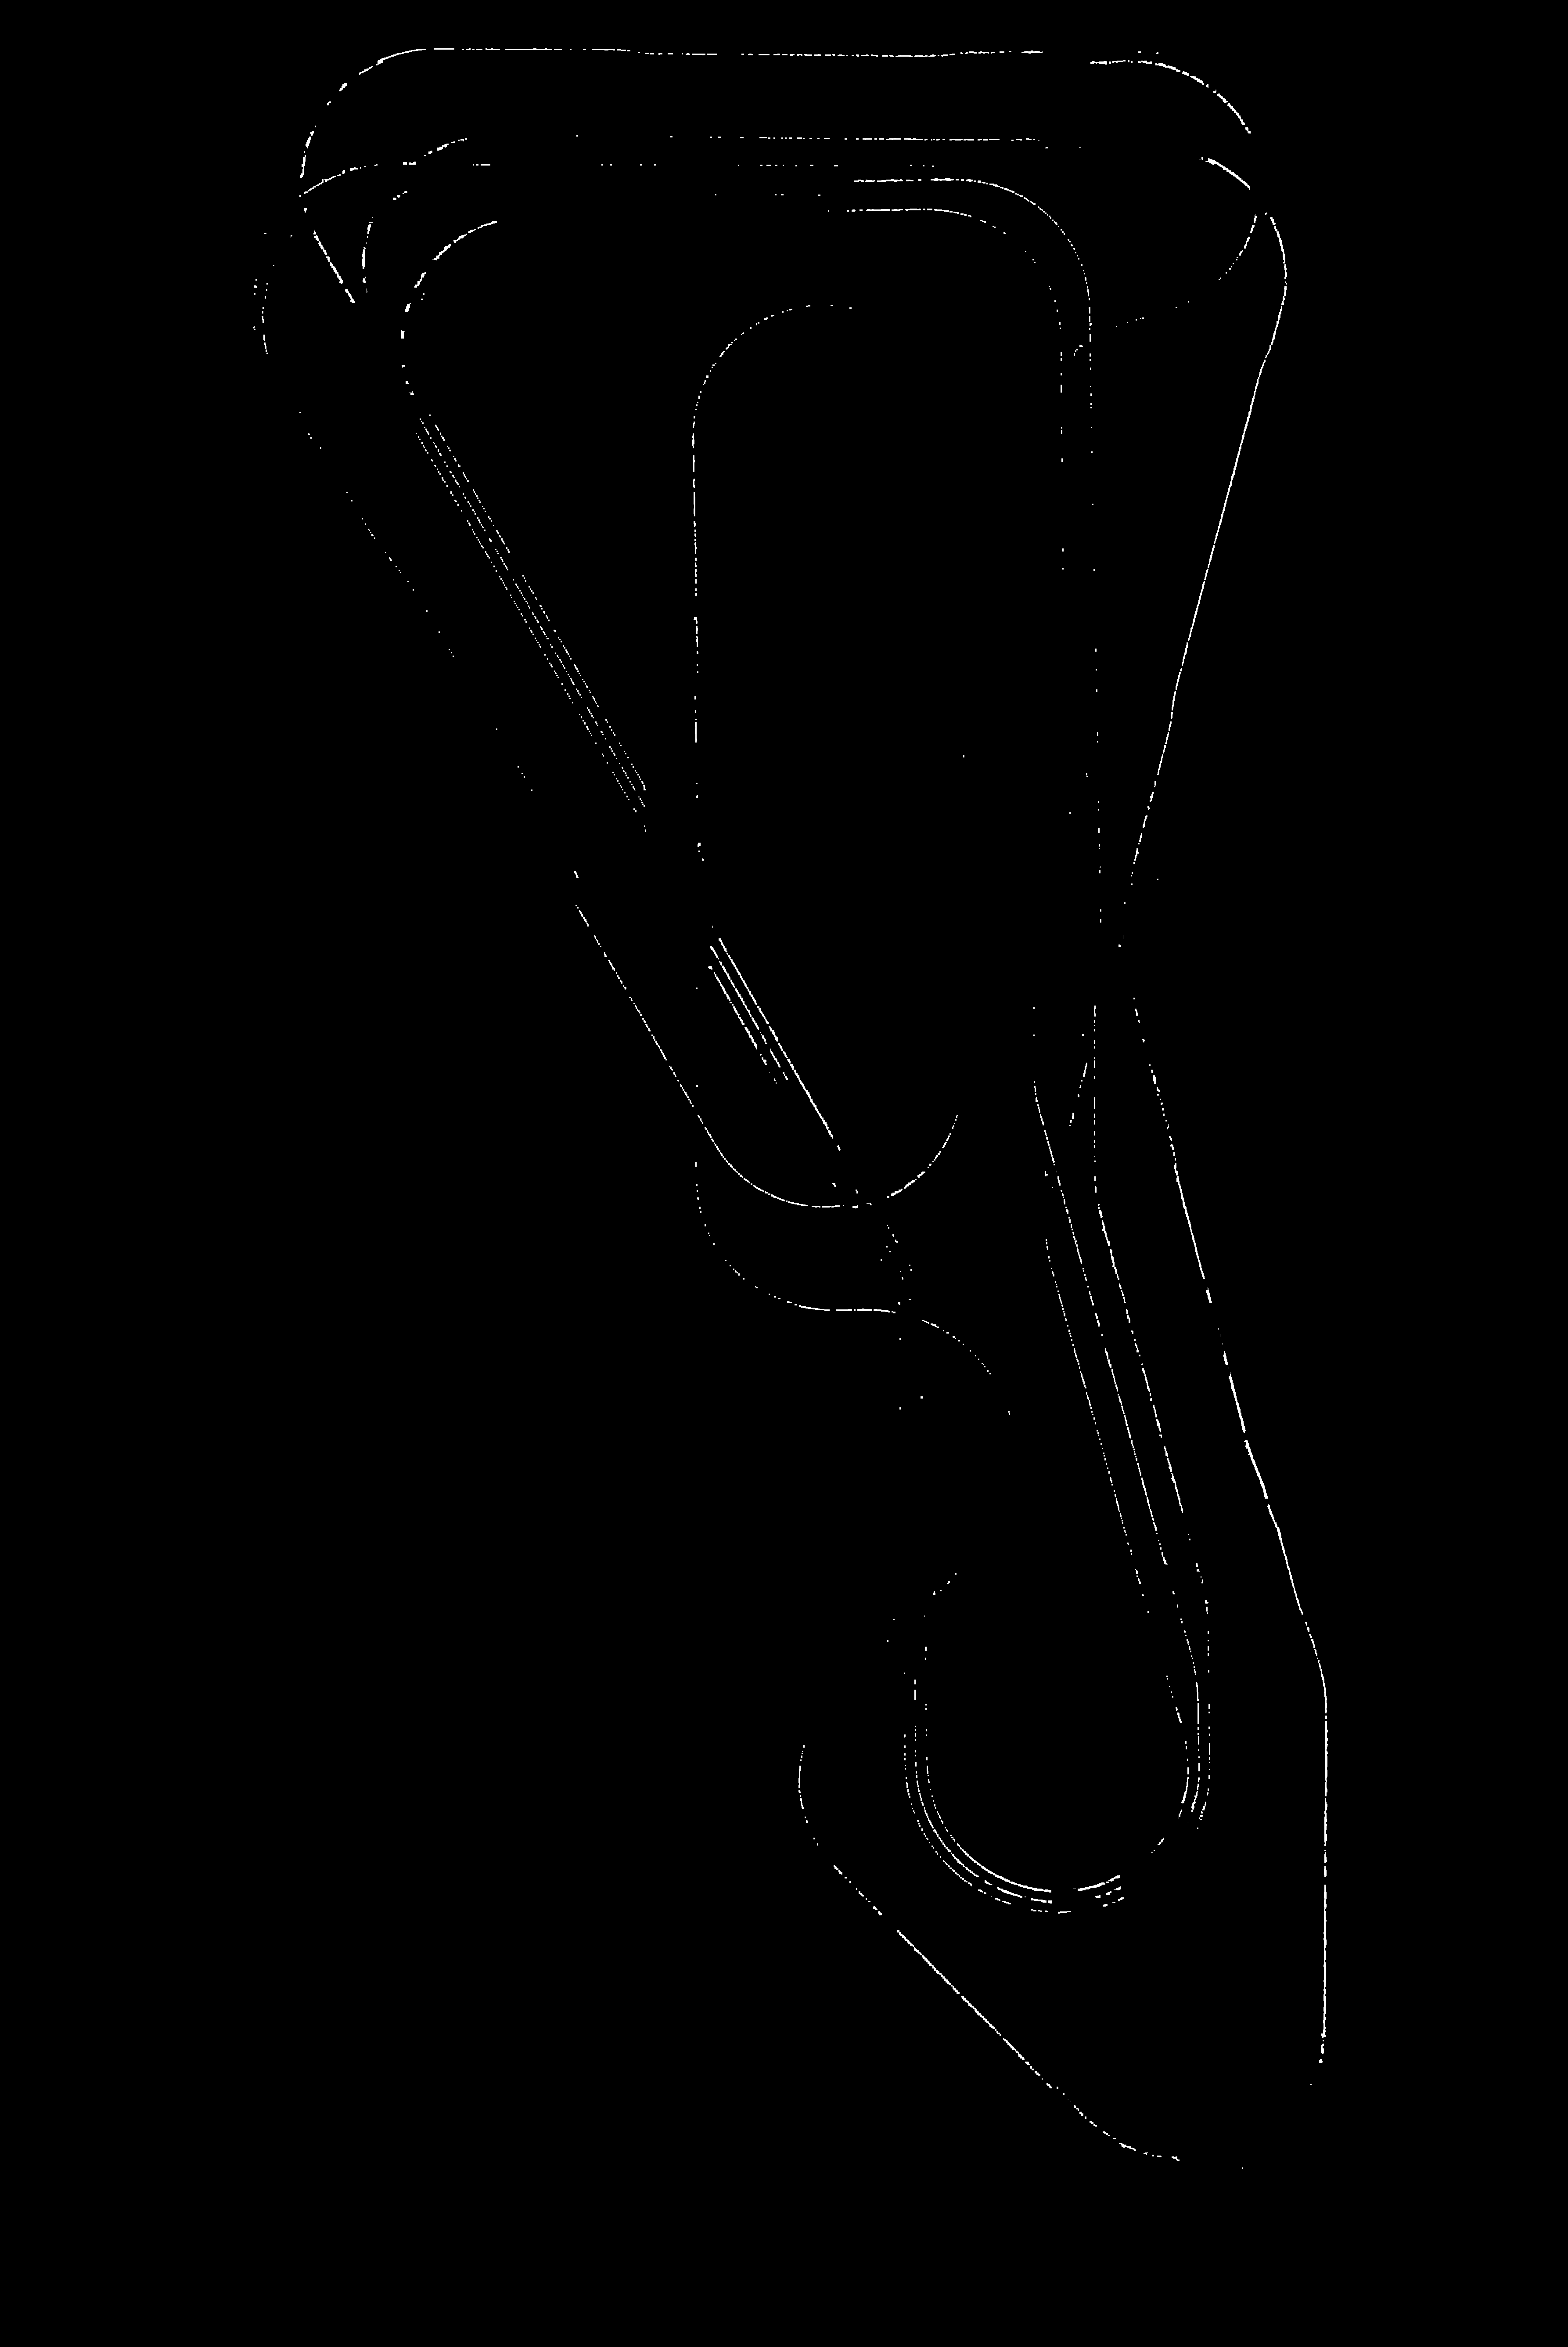

In [7]:
result = saltfree - cluster
result = np.where(result == 1, 0, result)
good_points = Image.fromarray(result)
good_points.save('./data/images/good_points.png')
good_points.save(join(constants.DUMP, 'good_points.png'))
np.save(join(constants.DUMP, 'morph'), result)
display(good_points)

In [8]:
df.insert(0, 'morph_flg', False)
ui, vi = result.nonzero()
for i in range(ui.shape[0]):
    idx = df.loc[(df.u==ui[i]) & (df.v==vi[i])].index
    df.loc[idx, 'morph_flg'] = True
df.to_csv(join(constants.DUMP, 'morph.csv'), header=True, index=False)